In [8]:
import xarray as xr
import matplotlib.pyplot as plt

In [24]:
ds = xr.open_dataset('test_highres/ERA5_HiRes_Hourly_Energy_2021_01.nc')

vnames = {'p74.162': 'nw_geopotential_flux',
          'p70.162': 'nw_heat_flux',
          'p68.162': 'nw_kinetic_flux',
          'p76.162': 'nw_total_energy_flux'}
ds = ds.rename(vnames)

In [25]:
dsm = ds.mean(dim='time').mean(dim='longitude')

In [26]:
dsm['nw_latent_flux'] = dsm['nw_total_energy_flux'] - dsm['nw_geopotential_flux'] - dsm['nw_heat_flux'] - dsm['nw_kinetic_flux']

In [27]:
dsm.to_netcdf('test_highres/ERA5_HiRes_Hourly_Energy_2021_01_avg.nc')

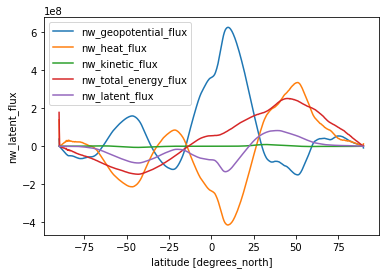

In [13]:
for v in dsm:
    dsm[v].plot(label=v);
plt.legend();

In [14]:
ds.close()

In [15]:
ds = xr.open_dataset('ERA5_LowRes_Hourly_Energy_2021_01.nc')

vnames = {'p74.162': 'nw_geopotential_flux',
          'p70.162': 'nw_heat_flux',
          'p68.162': 'nw_kinetic_flux',
          'p76.162': 'nw_total_energy_flux'}
ds = ds.rename(vnames)

In [16]:
dsm_lr = ds.mean(dim='time').mean(dim='longitude')

In [17]:
dsm_lr['nw_latent_flux'] = dsm_lr['nw_total_energy_flux'] - dsm_lr['nw_geopotential_flux'] - dsm_lr['nw_heat_flux'] - dsm_lr['nw_kinetic_flux']

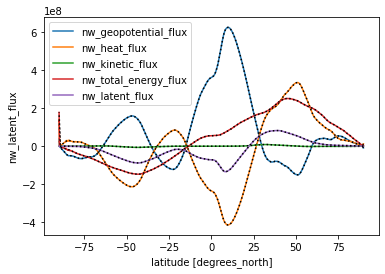

In [20]:
for i, v in enumerate(dsm):
    dsm[v].plot(label=v, color=f'C{i}');
    dsm_lr[v].plot(linestyle=':', color=f'k');
plt.legend();

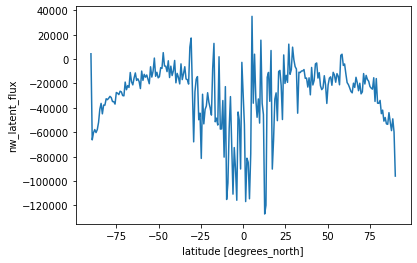

In [21]:
(dsm[v] - dsm_lr[v]).plot();

In [22]:
dsm

<xarray.Dataset>
Dimensions:               (latitude: 721)
Coordinates:
  * latitude              (latitude) float32 90.0 89.75 89.5 ... -89.75 -90.0
Data variables:
    nw_geopotential_flux  (latitude) float32 -8.773e+06 2.283e+06 ... 3.79e+07
    nw_heat_flux          (latitude) float32 1.246e+07 -6.335e+04 ... 1.392e+08
    nw_kinetic_flux       (latitude) float32 -2.652e+04 -7.025e+04 ... 1.672e+05
    nw_total_energy_flux  (latitude) float32 3.502e+06 2.294e+06 ... 1.777e+08
    nw_latent_flux        (latitude) float32 -1.582e+05 1.448e+05 ... 4.055e+05

In [23]:
dsm_lr

<xarray.Dataset>
Dimensions:               (latitude: 241)
Coordinates:
  * latitude              (latitude) float32 90.0 89.25 88.5 ... -89.25 -90.0
Data variables:
    nw_geopotential_flux  (latitude) float32 -8.776e+06 2.589e+06 ... 3.789e+07
    nw_heat_flux          (latitude) float32 1.277e+07 1.97e+06 ... 1.396e+08
    nw_kinetic_flux       (latitude) float32 -2.739e+04 -1.976e+05 ... 1.672e+05
    nw_total_energy_flux  (latitude) float32 3.904e+06 4.777e+06 ... 1.781e+08
    nw_latent_flux        (latitude) float32 -6.224e+04 4.155e+05 ... 4.012e+05